# IPC data interpolation

## Set export to True if you wish to export graphs and tables

In [1]:
seed = 1337
export = True

SyntaxError: invalid syntax (3065609159.py, line 2)

In [3]:
%matplotlib inline

import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
from os import listdir
from matplotlib.patches import Patch
from matplotlib.cm import get_cmap

In [4]:
df_admin2 = gpd.read_file('../Geography/Somalia/Som_Admbnda_Adm2_UNDP.shp')
df_admin2['admin2Name'] = df_admin2['admin2Name'].str.lower()

NameError: name 'col1' is not defined

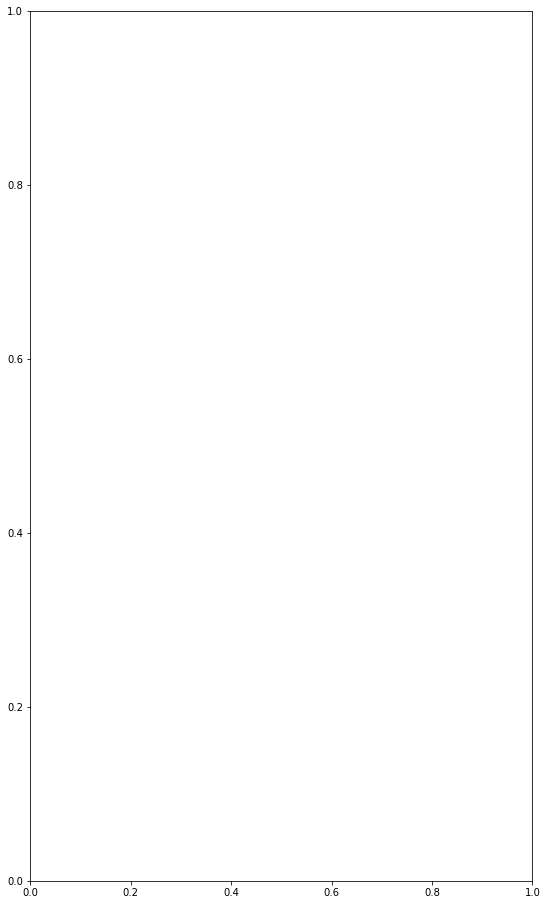

In [5]:
fig, ax = plt.subplots(figsize=(9, 16))

df_admin2.plot(ax=ax, color=(col1 * mask + col2 * (1 - mask))/255, edgecolor='black', linewidth=0.1)
centres = list(zip(df_admin2['geometry'].centroid.x, df_admin2['geometry'].centroid.y))

for idx, row in df_admin2.iterrows():
    plt.annotate(text=row['admin2Name'], xy=centres[idx],
                 horizontalalignment='center', size=3)
ax.axis('off')

legend_elements = [Patch(facecolor=col1[0]/255, edgecolor='black', label='Somalia'),
                         Patch(facecolor=col2[0]/255, edgecolor='black', label='Somaliland')]
ax.legend(handles=legend_elements, loc='center right', fontsize=10)
plt.tight_layout();

if for_report:
    fig.savefig('admin2_names.png', dpi=300, bbox_inches='tight')

In [9]:
epsilon = 0.01 # percentage of unknown overlap deemed acceptable

file_dir = '../Datasets/East Africa/'
l = listdir(file_dir)
files = [f for f in l if f.endswith('.shp')] # and any(s in f for s in ['2017', '2018', '2019', '2020', '2021'])]

# classification based on weighted average by size of overlapping area
phase_list_weighted = []
# classification based on largest overlapping area
phase_list_max = []

for file in files:
    df_geo = gpd.read_file(file_dir + file)
    for idx, row in df_admin2.iterrows():
        polygon = row['geometry']
        intersect = df_geo['geometry'].intersects(polygon, align=False)
        
        if np.any(intersect):
            # calculate intersection with all polynomials of covering East Africa
            intersect_area = df_geo['geometry'].intersection(polygon, align=False).area
            # unknown classification codes
            mask = df_geo['CS'] > 5
            area_weights = intersect_area/intersect_area.sum()
            if area_weights[mask].sum() > epsilon:
                continue
                
            area_weights = area_weights[~mask]
            area_weights = area_weights/area_weights.sum()
            df_geo = df_geo[~mask]
                
            phase_weighted = area_weights @ df_geo['CS']
            phase_max = phase = df_geo.iloc[area_weights.argmax()]['CS']
            area = row['admin2Name']
            date = pd.to_datetime(file[3:9], format='%Y%m')
            
            phase_list_weighted.append((area, phase_weighted, date))
            phase_list_max.append((area, phase_max, date))

In [25]:
'CS' in df_geo.columns

True

In [26]:
epsilon = 0.01 # percentage of unknown overlap deemed acceptable

file_dir = '../Datasets/East Africa/'
l = listdir(file_dir)
files = [f for f in l if f.endswith('.shp')] # and any(s in f for s in ['2017', '2018', '2019', '2020', '2021'])]

# classification based on weighted average by size of overlapping area
phase_list_weighted = []
# classification based on largest overlapping area
phase_list_max = []
i = 0
for file in files:
    df_geo = gpd.read_file(file_dir + file)
    if not 'HA0' in df_geo.columns:
        continue
    for idx, row in df_admin2.iterrows():
        polygon = row['geometry']
        intersect = df_geo['geometry'].intersects(polygon, align=False)
        
        if np.any(intersect):
            # calculate intersection with all polynomials of covering East Africa
            intersect_area = df_geo['geometry'].intersection(polygon, align=False).area
            # unknown classification codes
            mask = df_geo['HA0'] > 1
            area_weights = intersect_area/intersect_area.sum()
            if area_weights[mask].sum() > epsilon:
                continue
                
            area_weights = area_weights[~mask]
            area_weights = area_weights/area_weights.sum()
            df_geo = df_geo[~mask]
                
            phase_weighted = area_weights @ df_geo['HA0']
            phase_max = phase = df_geo.iloc[area_weights.argmax()]['HA0']
            area = row['admin2Name']
            date = pd.to_datetime(file[3:9], format='%Y%m')
            
            phase_list_weighted.append((area, phase_weighted, date))
            phase_list_max.append((area, phase_max, date))
            
    i += 1

In [30]:
pd.DataFrame(phase_list_weighted, columns=['area', 'hum_assistance', 'date']).to_csv('../Datasets/humantarian_assistance.csv', index=False)

In [31]:
phase_list_weighted

[('banadir', 0.0, Timestamp('2018-10-01 00:00:00')),
 ('borama', 0.1794800696328876, Timestamp('2018-10-01 00:00:00')),
 ('baki', 0.24143577907935423, Timestamp('2018-10-01 00:00:00')),
 ('lughaye', 0.9840931023310745, Timestamp('2018-10-01 00:00:00')),
 ('zeylac', 0.8040311201856124, Timestamp('2018-10-01 00:00:00')),
 ('hargeysa', 0.0, Timestamp('2018-10-01 00:00:00')),
 ('berbera', 0.36027934317705596, Timestamp('2018-10-01 00:00:00')),
 ('gebiley', 0.0, Timestamp('2018-10-01 00:00:00')),
 ('burco', 0.0005548219864843554, Timestamp('2018-10-01 00:00:00')),
 ('buuhoodle', 0.0020343034148593768, Timestamp('2018-10-01 00:00:00')),
 ('owdweyne', 0.0, Timestamp('2018-10-01 00:00:00')),
 ('sheikh', 0.0, Timestamp('2018-10-01 00:00:00')),
 ('laas caanood', 0.6975441815499648, Timestamp('2018-10-01 00:00:00')),
 ('caynabo', 0.8874437948070446, Timestamp('2018-10-01 00:00:00')),
 ('taleex', 0.9993022587040905, Timestamp('2018-10-01 00:00:00')),
 ('xudun', 1.0, Timestamp('2018-10-01 00:00:00'

In [16]:
march_2011 = pd.to_datetime('2011-04-01')
march_2011

Timestamp('2011-04-01 00:00:00')

In [17]:
pd.to_datetime('EA_201004_CS'.split('_')[1], format='%Y%m') > march_2011

False

In [10]:
df_ipc  = pd.read_csv('../Datasets/ipc.csv', parse_dates=['date'], usecols=['date', 'area', 'area_phase'])
df_ipc['area'] = df_ipc['area'].str.lower()
df_ipc.set_index(['area', 'date'], inplace=True)

In [11]:
df_phase_est_weighted = pd.DataFrame(phase_list_weighted, columns=['area', 'phase_weighted', 'date'])
df_phase_est_weighted['area'] = df_phase_est_weighted['area'].str.lower()
df_phase_est_weighted.set_index(['area', 'date'], inplace=True)

df_phase_est_max = pd.DataFrame(phase_list_max, columns=['area', 'phase_max', 'date'])
df_phase_est_max['area'] = df_phase_est_max['area'].str.lower()
df_phase_est_max.set_index(['area', 'date'], inplace=True)

In [14]:
df_phase_est_weighted.reset_index().to_csv('../Datasets/df_phase_est.csv')

In [13]:
df_phase = df_phase_est_weighted.merge(df_ipc, left_index=True, right_index=True, how='outer')
df_phase = df_phase.merge(df_phase_est_max, left_index=True, right_index=True, how='left')
df_phase = df_phase.groupby('area').apply(lambda x: x.reset_index().set_index('date').interpolate(method='time')).reset_index(drop='area')


l = [[abs(df_phase['phase_weighted'] - df_phase['area_phase']).mean(),
 ((df_phase['phase_weighted'] - df_phase['area_phase'])**2).mean()],
 [abs(df_phase['phase_max'] - df_phase['area_phase']).mean(),
 ((df_phase['phase_max'] - df_phase['area_phase'])**2).mean()]]

pd.DataFrame(np.round(np.array(l).T, 3), index=['MAE', 'MSE'], columns=['weighted average', 'largest coverage'])

if for_report:
    print(pd.DataFrame(np.round(np.array(l).T, 3), index=['MAE', 'MSE'], columns=['weighted average', 'largest coverage']).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  weighted average &  largest coverage \\
\midrule
MAE &             0.358 &             0.399 \\
MSE &             0.261 &             0.375 \\
\bottomrule
\end{tabular}



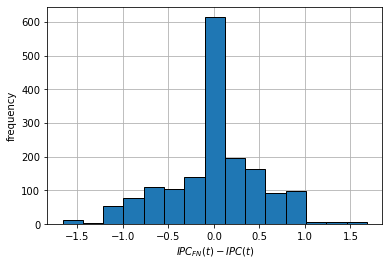

In [14]:
fig, ax = plt.subplots()
(df_phase['phase_weighted'] - df_phase['area_phase']).hist(bins=15, edgecolor='black', ax=ax)
ax.set_xlabel('$IPC_{FN}(t) - IPC(t)$')
ax.set_ylabel('frequency')
ax.set_axisbelow(True);
# likely an interpolation artefact

if for_report:
    fig.savefig('error_fewsnet_estimates_hist.png', dpi=300)

In [15]:
from scipy.stats import wilcoxon
mask = (~df_phase['phase_weighted'].isna() & ~df_phase['area_phase'].isna())
stat, p = wilcoxon(df_phase[mask]['phase_weighted'], df_phase[mask]['area_phase'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=473338.500, p=0.073


In [16]:
(df_phase['phase_weighted'] - df_phase['area_phase']).mean().round(3)

0.008

In [17]:
MSE_list = []

for m in range(0, 9):
    df_phase_est_weighted = pd.DataFrame(phase_list_weighted, columns=['area', 'phase_weighted', 'date'])
    df_phase_est_weighted['date'] = df_phase_est_weighted['date'] + pd.DateOffset(months=m)
    df_phase_est_weighted['area'] = df_phase_est_weighted['area'].str.lower()
    df_phase_est_weighted.set_index(['area', 'date'], inplace=True)
    
    df_phase_est_max = pd.DataFrame(phase_list_max, columns=['area', 'phase_max', 'date'])
    df_phase_est_max['date'] = df_phase_est_max['date'] + pd.DateOffset(months=m)
    df_phase_est_max['area'] = df_phase_est_max['area'].str.lower()
    df_phase_est_max.set_index(['area', 'date'], inplace=True)

    df_phase = df_phase_est_weighted.merge(df_ipc, left_index=True, right_index=True, how='outer')
    df_phase = df_phase.merge(df_phase_est_max, left_index=True, right_index=True, how='left')
    df_phase = df_phase.groupby('area').apply(lambda x: x.reset_index().set_index('date').interpolate(method='time')).reset_index(drop='area')

    MSE_weighted = ((df_phase['phase_weighted'] - df_phase['area_phase'])**2).mean()
    MSE_max = ((df_phase['phase_max'] - df_phase['area_phase'])**2).mean()
    MSE_list.append((MSE_weighted, MSE_max))
    
MSE_array = np.array(MSE_list)

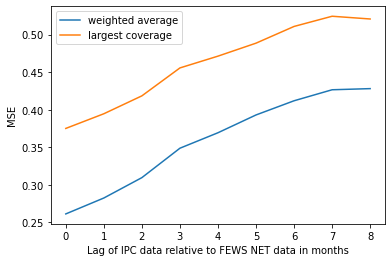

In [20]:
fig, ax = plt.subplots()
ax.plot(MSE_array[:, 0])
ax.plot(MSE_array[:, 1])
ax.legend(['weighted average', 'largest coverage'])

ax.set_xlabel('Lag of IPC data relative to FEWS NET data in months')
ax.set_ylabel('MSE');

if for_report:
    fig.savefig('MSE_FEWSNET_lag.png', dpi=300)

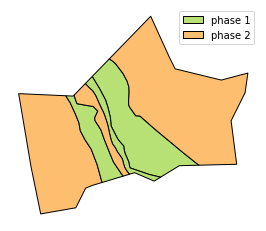

In [22]:
fig, ax = plt.subplots()

df_geo = gpd.read_file('../Datasets/East Africa/EA_202102_CS.shp')
example = df_geo['geometry'].intersection(df_admin2.iloc[38]['geometry'], align=False)
cmap = get_cmap('RdYlGn_r')
example.drop(example.index[5]).plot(color=df_geo['CS'].drop(df_geo['CS'].index[5]).
                                    apply(lambda x: cmap(1/3) if x == 1 else cmap(2/3)), edgecolor='black', ax=ax)

legend_elements = [Patch(facecolor=cmap(1/3), edgecolor='black',
                         label='phase 1'), Patch(facecolor=cmap(2/3), edgecolor='black',
                         label='phase 2')]

ax.legend(handles=legend_elements)
ax.axis('off');

fig.savefig('belet_weyne_feb_2012_areas.png', dpi=300)

In [23]:
df_example = pd.DataFrame([(example.area / example.area.sum()).round(4), df_geo['CS']], index=['weights', 'classification'])
df_example.columns = df_example.iloc[1]
df_example.drop(df_example.index[1])

classification,99.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,88.0
weights,0.0,0.4467,0.0,0.5146,0.0387,0.0,0.0,0.0,0.0


In [24]:
epsilon = 0.01 # percentage of unknown overlap deemed acceptable

file_dir = '../Datasets/East Africa/'
l = listdir(file_dir)
files = [f for f in l if (f.endswith('.shp') and '200907' not in f)]

# classification based on weighted average by size of overlapping area
phase_list_weighted = []
# classification based on largest overlapping area
phase_list_max = []

for file in files:
    df_geo = gpd.read_file(file_dir + file)
    for idx, row in df_admin2.iterrows():
        polygon = row['geometry']
        intersect = df_geo['geometry'].intersects(polygon, align=False)
        
        if np.any(intersect):
            # calculate intersection with all polynomials of covering East Africa
            intersect_area = df_geo['geometry'].intersection(polygon, align=False).area
            # unknown classification codes
            mask = df_geo['CS'] > 5
            area_weights = intersect_area/intersect_area.sum()
            if area_weights[mask].sum() > epsilon:
                continue
                
            area_weights = area_weights[~mask]
            area_weights = area_weights/area_weights.sum()
            df_geo = df_geo[~mask]
                
            phase_weighted = area_weights @ df_geo['CS']
            phase_max = phase = df_geo.iloc[area_weights.argmax()]['CS']
            area = row['admin2Name']
            date = pd.to_datetime(file[3:9], format='%Y%m')
            
            phase_list_weighted.append((area, phase_weighted, date))

In [25]:
df_phase_fews_net = pd.DataFrame(phase_list_weighted, columns=['area', 'area_phase', 'date'])
df_phase_fews_net['area'] = df_phase_fews_net['area'].str.lower()
df_phase_fews_net.set_index(['area', 'date'], inplace=True)

In [12]:
df_phase_fews_net = pd.read_csv('../Datasets/df_phase_est.csv',parse_dates=['date'])
df_phase_fews_net['area'] = df_phase_fews_net['area'].str.lower()
df_phase_fews_net.set_index(['area', 'date'], inplace=True)


In [13]:
df_food_crisis = pd.read_csv('../Datasets/predicting_food_crises_data.csv', usecols=['admin_name', 'year_month', 'pop', 'country'])
df_food_crisis = df_food_crisis[df_food_crisis['country'] == 'Somalia']
df_food_crisis['date'] = pd.to_datetime(df_food_crisis['year_month'], format='%Y_%m')
del df_food_crisis['year_month']
del df_food_crisis['country']
# df_food_crisis.set_index('date', inplace=True)
# df_food_crisis.sort_index(inplace=True)
df_food_crisis['admin_name'] = df_food_crisis['admin_name'].str.lower()

In [14]:
df_plot = pd.concat([df_ipc, df_phase_fews_net])
df_plot = df_plot.merge(df_food_crisis, left_index=True, right_on=['admin_name', 'date'])
df_plot_date_grouped = df_plot.groupby('date')
df_plot_date_grouped['pop']
l = []
for date, df_grouped in df_plot_date_grouped:
    phase = np.average(df_grouped['area_phase'], weights=(df_grouped['pop']))
    l.append((date, phase))
    
l = np.array(l)

KeyError: 'area_phase'

NameError: name 'l' is not defined

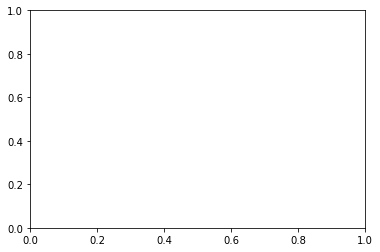

In [9]:
fig, ax = plt.subplots()

ax.plot(l[:, 0], l[:, 1])
ax.set_xlabel('date');
ax.set_ylabel('mean population weighted IPC phase');

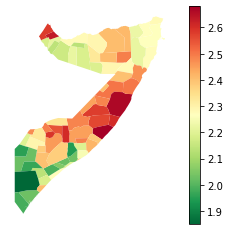

In [45]:
fig, ax = plt.subplots()

df_mean_phase_area = df_plot.groupby('admin_name')['area_phase'].mean()
df_plot_phase = df_admin2.merge(df_mean_phase_area, left_on='admin2Name', right_on=['admin_name'])
df_plot_phase.plot(column='area_phase', cmap='RdYlGn_r', legend=True, ax=ax)
ax.axis('off');

if for_report:
    fig.savefig('somalia_mean_phase_per_area.png', dpi=300, bbox_inches='tight')

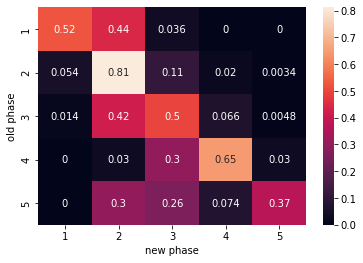

In [70]:
fig, ax = plt.subplots()
#phase_changes = df_plot.set_index(['admin_name', 'date']).sort_index().groupby('admin_name').diff()['area_phase'].reset_index(drop=True)
phases_old = df_phase_fews_net.sort_index()[['area_phase']]
phases_new = df_phase_fews_net.sort_index()['area_phase'].shift(-1)
old_new = phases_old.merge(phases_new, left_index=True, right_index=True).dropna().to_numpy()

A = np.zeros((5, 5))
for i, j in np.round(old_new).astype('int8'):
    A[i - 1, j - 1] += 1
    
sns.heatmap(A / A.sum(axis=1).reshape(5, -1), annot=True, ax=ax)
ax.set_xticklabels(range(1, 6))
ax.set_yticklabels(range(1, 6));
ax.set_xlabel('new phase')
ax.set_ylabel('old phase');

if for_report:
    fig.savefig('phase_transition_matrix_lag_1', dpi=300)

<AxesSubplot:>

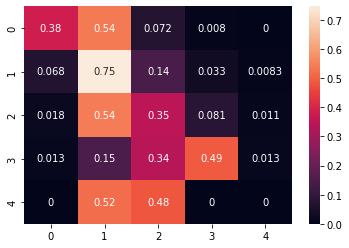

In [73]:
#phase_changes = df_plot.set_index(['admin_name', 'date']).sort_index().groupby('admin_name').diff()['area_phase'].reset_index(drop=True)
phases_old = df_phase_fews_net.sort_index()[['area_phase']]
phases_new = df_phase_fews_net.sort_index()['area_phase'].shift(-2)
old_new = phases_old.merge(phases_new, left_index=True, right_index=True).dropna().to_numpy()

B = np.zeros((5, 5))
for i, j in np.round(old_new).astype('int8'):
    B[i - 1, j - 1] += 1
    
sns.heatmap(B / B.sum(axis=1).reshape(5, -1), annot=True)

<AxesSubplot:>

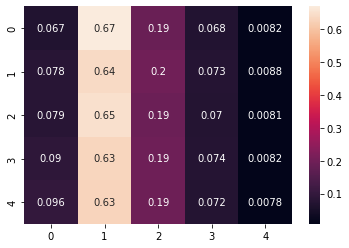

In [74]:
#phase_changes = df_plot.set_index(['admin_name', 'date']).sort_index().groupby('admin_name').diff()['area_phase'].reset_index(drop=True)
phases_old = df_phase_fews_net.sort_index()[['area_phase']]
phases_new = df_phase_fews_net.sort_index()['area_phase'].shift(-10)
old_new = phases_old.merge(phases_new, left_index=True, right_index=True).dropna().to_numpy()

A = np.zeros((5, 5))
for i, j in np.round(old_new).astype('int8'):
    A[i - 1, j - 1] += 1
    
sns.heatmap((A / A.sum(axis=1).reshape(5, -1)) @ (A / A.sum(axis=1).reshape(5, -1)) , annot=True)

<AxesSubplot:>

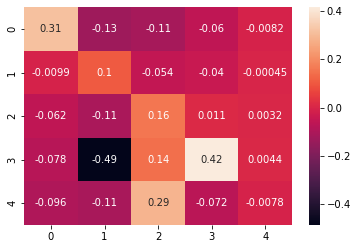

In [75]:
sns.heatmap(B / B.sum(axis=1).reshape(5, -1) - (A / A.sum(axis=1).reshape(5, -1)) @ (A / A.sum(axis=1).reshape(5, -1)), annot=True)

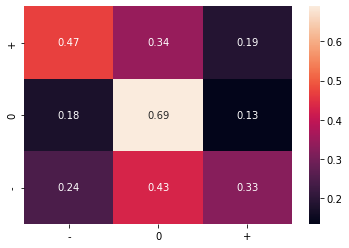

In [76]:
delta = 0.1
phase_changes = df_plot.set_index(['admin_name', 'date']).sort_index().groupby('admin_name').diff()[['area_phase']]
phase_changes_classes = (phase_changes > delta) * 2 + ((phase_changes >= -delta) & (phase_changes <= delta)) * 1
phase_changes_classes = phase_changes_classes.merge(phase_changes_classes.shift(-1), left_index=True, right_index=True)
#phase_changes_classes = (phase_changes > delta) * 2 + (phase_changes >= -delta & phase_changes <= -delta) * 1

A = np.zeros((3, 3))
for i, j in phase_changes_classes.dropna().astype('int').to_numpy():
    A[i, j] += 1

ax = sns.heatmap(A / A.sum(axis=1).reshape(3, -1), annot=True, xticklabels=['-', '0', '+'], yticklabels=['-', '0', '+'])
ax.invert_yaxis()

# phase_changes_classes.dropna().astype('int')


In [89]:
phase_changes = df_plot.set_index(['admin_name', 'date']).sort_index().groupby('admin_name').diff()[['area_phase']]
plt.bar(phase_changes['area_phase'])

TypeError: bar() missing 1 required positional argument: 'height'

<BarContainer object of 12 artists>

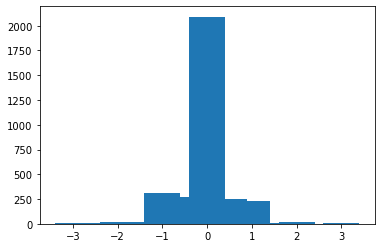

In [102]:
plt.bar(*np.unique((round(phase_changes['area_phase'] * 2) / 2).dropna(), return_counts=True))

In [77]:
phase_changes.iloc[:, 0]

admin_name   date      
adan yabaal  2009-10-01         NaN
             2010-01-01    0.000000
             2010-04-01    0.000000
             2010-07-01   -1.000000
             2010-10-01    0.999140
                             ...   
zeylac       2019-06-01    0.805506
             2019-08-01   -0.609537
             2019-10-01   -0.194496
             2020-01-01   -0.805504
             2020-02-01    0.000000
Name: area_phase, Length: 3323, dtype: float64

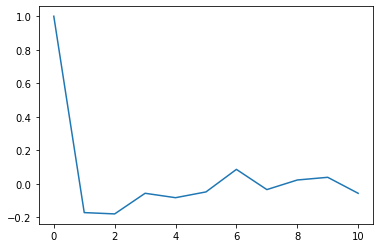

In [103]:
phase_changes = df_phase_fews_net.sort_index().groupby('area').diff()[['area_phase']]
for i in range(1, 11):
    phase_changes = phase_changes.merge(phase_changes.iloc[:, 0].shift(-i), left_index=True, right_index=True)

plt.plot(phase_changes.corr().iloc[:, 0].to_numpy())

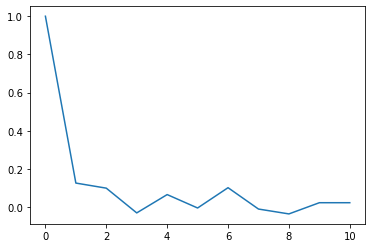

In [112]:
phase_changes = df_phase_fews_net.sort_index().groupby('area').diff()[['area_phase']]
for i in range(1, 11):
    phase_changes = phase_changes.merge(phase_changes.iloc[:, 0].shift(-i), left_index=True, right_index=True)

plt.plot(abs(phase_changes).corr().iloc[:, 0].to_numpy())

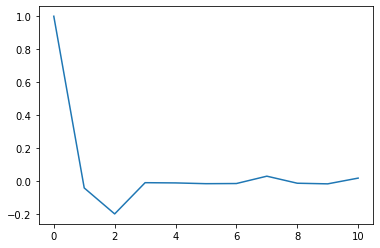

In [128]:
phase_changes = df_phase_fews_net.sort_index().groupby('area').diff()[['area_phase']]
for i in range(1, 11):
    phase_changes = phase_changes.merge(phase_changes.iloc[:, 0].shift(-i), left_index=True, right_index=True)

    
phase_changes.iloc[:, 0] = phase_changes.iloc[:, 0] ** 2
plt.plot(phase_changes.corr().iloc[:, 0].to_numpy())

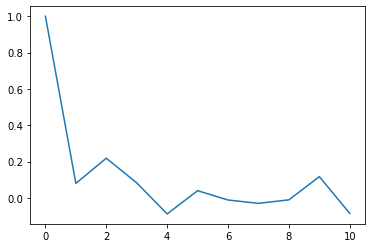

In [127]:
phase_changes = df_phase_fews_net.sort_index().groupby('area').diff()[['area_phase']]
for i in range(1, 11):
    phase_changes = phase_changes.merge(phase_changes.iloc[:, 0].shift(-i), left_index=True, right_index=True)

    
phase_changes_cop = phase_changes.iloc[:, 0].copy()
phase_changes = abs(phase_changes)
phase_changes.iloc[:, 0] = phase_changes_cop
plt.plot(phase_changes.corr().iloc[:, 0].to_numpy())

In [118]:
phase_changes

area_phase_x_x_x_x_x_x_x_x_x_x  area_phase_y  \
area        date                                                       
adan yabaal 2009-10-01                             NaN      0.000000   
            2010-01-01                        0.000000      0.000000   
            2010-04-01                        0.000000     -1.000000   
            2010-07-01                       -1.000000      0.999140   
            2010-10-01                        0.999140      0.000000   
...                                                ...           ...   
zeylac      2020-06-01                        0.000000      0.805504   
            2020-10-01                        0.805504     -0.805503   
            2021-02-01                       -0.805503      0.805504   
            2021-06-01                        0.805504     -0.805504   
            2021-10-01                       -0.805504           NaN   

                        area_phase_x_y  area_phase_x_x_y  area_phase_x_x_x_y  \
area        date                                                               
adan yabaal 2009-10-01        0.000000         -1.000000            0.999140   
            2010-01-01       -1.000000          0.999140            0.000000   
            2010-04-01        0.999140          0.000000            0.000000   
            2010-07-01        0.000000          0.000000            0.000860   
            2010-10-01        0.000000          0.000860            0.000019   
...                                ...               ...                 ...   
zeylac      2020-06-01       -0.805503          0.805504           -0.805504   
            2020-10-01        0.805504         -0.805504                 NaN   
            2021-02-01       -0.805504               NaN                 NaN   
            2021-06-01             NaN               NaN                 NaN   
            2021-10-01             NaN               NaN                 NaN   

                        area_phase_x_x_x_x_y  area_phase_x_x_x_x_x_y  \
area        date                                                       
adan yabaal 2009-10-01              0.000000                0.000000   
            2010-01-01              0.000000                0.000860   
            2010-04-01              0.000860                0.000019   
            2010-07-01              0.000019               -0.069530   
            2010-10-01             -0.069530               -0.981852   
...                                      ...                     ...   
zeylac      2020-06-01                   NaN                     NaN   
            2020-10-01                   NaN                     NaN   
            2021-02-01                   NaN                     NaN   
            2021-06-01                   NaN                     NaN   
            2021-10-01                   NaN                     NaN   

                        area_phase_x_x_x_x_x_x_y  area_phase_x_x_x_x_x_x_x_y  \
area        date                                                               
adan yabaal 2009-10-01                  0.000860                    0.000019   
            2010-01-01                  0.000019                   -0.069530   
            2010-04-01                 -0.069530                   -0.981852   
            2010-07-01                 -0.981852                    0.000000   
            2010-10-01                  0.000000                    0.000000   
...                                          ...                         ...   
zeylac      2020-06-01                       NaN                         NaN   
            2020-10-01                       NaN                         NaN   
            2021-02-01                       NaN                         NaN   
            2021-06-01                       NaN                         NaN   
            2021-10-01                       NaN                         NaN   

                        area_phase_x_x_x_x_x_x_x_x_y  \
area        

In [1686]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, lo, hi

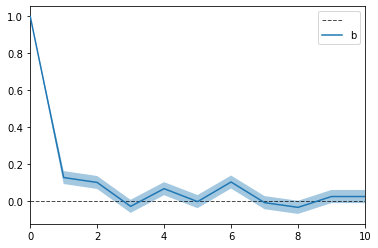

In [1742]:
fig, ax = plt.subplots()
l = []
for i in range(0, 11):
    mask = ~phase_changes.iloc[:, 0].isna() & ~phase_changes.iloc[:, i].isna()
    #pearsonr_ci(phase_changes[mask].iloc[:, 0], phase_changes[mask].iloc[:, 1])
    l.append(pearsonr_ci(abs(phase_changes[mask].iloc[:, 0]), abs(phase_changes[mask].iloc[:, i])))
    
    
l = np.array(l)

ax.plot([0]*11, linestyle='dashed', color='black', linewidth=1, alpha=0.7)
ax.plot(l[:, 0], zorder=10)
ax.fill_between(range(0, 11), l[:, 1], l[:, 2], alpha = 0.4);
ax.set_xlim(0, 10);
# ax.legend(['', 'b'])


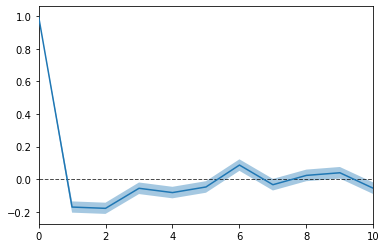

In [1745]:
fig, ax = plt.subplots()
l = []
for i in range(0, 11):
    mask = ~phase_changes.iloc[:, 0].isna() & ~phase_changes.iloc[:, i].isna()
    #pearsonr_ci(phase_changes[mask].iloc[:, 0], phase_changes[mask].iloc[:, 1])
    l.append(pearsonr_ci(phase_changes[mask].iloc[:, 0], phase_changes[mask].iloc[:, i]))
    
    
l = np.array(l)

ax.plot([0]*11, linestyle='dashed', color='black', linewidth=1, alpha=0.7)
ax.plot(l[:, 0], zorder=10)
ax.fill_between(range(0, 11), l[:, 1], l[:, 2], alpha = 0.4);
ax.set_xlim(0, 10);

In [1663]:
phase_changes

area_phase_x_x_x_x_x_x_x_x_x  area_phase_y  \
area        date                                                     
adan yabaal 2009-10-01                           NaN      0.000000   
            2010-01-01                      0.000000      0.000000   
            2010-04-01                      0.000000     -1.000000   
            2010-07-01                     -1.000000      0.999140   
            2010-10-01                      0.999140      0.000000   
...                                              ...           ...   
zeylac      2020-06-01                      0.000000      0.805504   
            2020-10-01                      0.805504     -0.805503   
            2021-02-01                     -0.805503      0.805504   
            2021-06-01                      0.805504     -0.805504   
            2021-10-01                     -0.805504           NaN   

                        area_phase_x_y  area_phase_x_x_y  area_phase_x_x_x_y  \
area        date                                                               
adan yabaal 2009-10-01        0.000000         -1.000000            0.999140   
            2010-01-01       -1.000000          0.999140            0.000000   
            2010-04-01        0.999140          0.000000            0.000000   
            2010-07-01        0.000000          0.000000            0.000860   
            2010-10-01        0.000000          0.000860            0.000019   
...                                ...               ...                 ...   
zeylac      2020-06-01       -0.805503          0.805504           -0.805504   
            2020-10-01        0.805504         -0.805504                 NaN   
            2021-02-01       -0.805504               NaN                 NaN   
            2021-06-01             NaN               NaN                 NaN   
            2021-10-01             NaN               NaN                 NaN   

                        area_phase_x_x_x_x_y  area_phase_x_x_x_x_x_y  \
area        date                                                       
adan yabaal 2009-10-01              0.000000                0.000000   
            2010-01-01              0.000000                0.000860   
            2010-04-01              0.000860                0.000019   
            2010-07-01              0.000019               -0.069530   
            2010-10-01             -0.069530               -0.981852   
...                                      ...                     ...   
zeylac      2020-06-01                   NaN                     NaN   
            2020-10-01                   NaN                     NaN   
            2021-02-01                   NaN                     NaN   
            2021-06-01                   NaN                     NaN   
            2021-10-01                   NaN                     NaN   

                        area_phase_x_x_x_x_x_x_y  area_phase_x_x_x_x_x_x_x_y  \
area        date                                                               
adan yabaal 2009-10-01                  0.000860                    0.000019   
            2010-01-01                  0.000019                   -0.069530   
            2010-04-01                 -0.069530                   -0.981852   
            2010-07-01                 -0.981852                    0.000000   
            2010-10-01                  0.000000                    0.000000   
...                                          ...                         ...   
zeylac      2020-06-01                       NaN                         NaN   
            2020-10-01                       NaN                         NaN   
            2021-02-01                       NaN                         NaN   
            2021-06-01                       NaN                         NaN   
            2021-10-01                       NaN                         NaN   

                        area_phase_x_x_x_x_x_x_x_x_y  
area        date                       

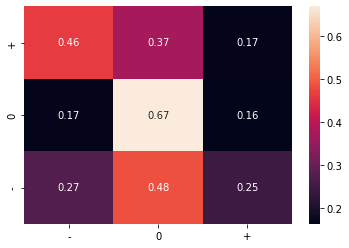

In [1640]:
delta = 0.1
phase_changes = df_phase_fews_net.sort_index().groupby('area').diff()[['area_phase']]
phase_changes_classes = (phase_changes > delta) * 2 + ((phase_changes >= -delta) & (phase_changes <= delta)) * 1
phase_changes_classes = phase_changes_classes.merge(phase_changes_classes.shift(-1), left_index=True, right_index=True)
#phase_changes_classes = (phase_changes > delta) * 2 + (phase_changes >= -delta & phase_changes <= -delta) * 1

A = np.zeros((3, 3))
for i, j in phase_changes_classes.dropna().astype('int').to_numpy():
    A[i, j] += 1

ax = sns.heatmap(A / A.sum(axis=1).reshape(3, -1), annot=True, xticklabels=['-', '0', '+'], yticklabels=['-', '0', '+'])
ax.invert_yaxis()

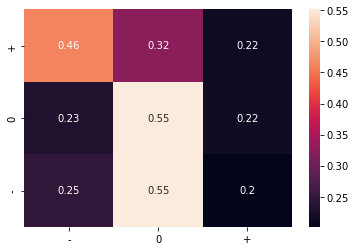

In [1602]:
delta = 0.1
phase_changes = df_phase_fews_net[mask].sort_index().groupby('area').diff()[['area_phase']]
phase_changes_classes = (phase_changes > delta) * 2 + ((phase_changes >= -delta) & (phase_changes <= delta)) * 1
phase_changes_classes = phase_changes_classes.merge(phase_changes_classes.shift(-2), left_index=True, right_index=True)
#phase_changes_classes = (phase_changes > delta) * 2 + (phase_changes >= -delta & phase_changes <= -delta) * 1

B = np.zeros((3, 3))
for i, j in phase_changes_classes.dropna().astype('int').to_numpy():
    B[i, j] += 1

ax = sns.heatmap(B / B.sum(axis=1).reshape(3, -1), annot=True, xticklabels=['-', '0', '+'], yticklabels=['-', '0', '+'])
ax.invert_yaxis()

In [1592]:
mask = df_phase_fews_net.reset_index().date.dt.month.isin([10, 1, 7]) | (df_phase_fews_net.reset_index().date.dt.year > 2015)
mask.index = df_phase_fews_net.index


In [1593]:
sorted(df_phase_fews_net.reset_index().date.unique())

[numpy.datetime64('2009-10-01T00:00:00.000000000'),
 numpy.datetime64('2010-01-01T00:00:00.000000000'),
 numpy.datetime64('2010-04-01T00:00:00.000000000'),
 numpy.datetime64('2010-07-01T00:00:00.000000000'),
 numpy.datetime64('2010-10-01T00:00:00.000000000'),
 numpy.datetime64('2011-01-01T00:00:00.000000000'),
 numpy.datetime64('2011-04-01T00:00:00.000000000'),
 numpy.datetime64('2011-07-01T00:00:00.000000000'),
 numpy.datetime64('2011-10-01T00:00:00.000000000'),
 numpy.datetime64('2012-01-01T00:00:00.000000000'),
 numpy.datetime64('2012-04-01T00:00:00.000000000'),
 numpy.datetime64('2012-07-01T00:00:00.000000000'),
 numpy.datetime64('2012-10-01T00:00:00.000000000'),
 numpy.datetime64('2013-01-01T00:00:00.000000000'),
 numpy.datetime64('2013-04-01T00:00:00.000000000'),
 numpy.datetime64('2013-07-01T00:00:00.000000000'),
 numpy.datetime64('2013-10-01T00:00:00.000000000'),
 numpy.datetime64('2014-01-01T00:00:00.000000000'),
 numpy.datetime64('2014-04-01T00:00:00.000000000'),
 numpy.datet

In [1594]:
pd.DataFrame(sorted(df_phase_fews_net[mask].reset_index().date.unique())).diff()

,0
0,NaT
1,92 days
2,181 days
3,92 days
4,92 days
5,181 days
6,92 days
7,92 days
8,182 days
9,92 days


In [1549]:
df_phase_fews_net.reset_index().date.dt.month.isin([1, 10, 2])

delta = 0.1
mask = df_phase_fews_net.reset_index().date.dt.month.isin([1, 10, 2])
mask.index = df_phase_fews_net.index
phase_changes = df_phase_fews_net[mask].sort_index().groupby('area').diff()[['area_phase']]
phase_changes_classes = (phase_changes > delta) * 2 + ((phase_changes >= -delta) & (phase_changes <= delta)) * 1
phase_changes_classes = phase_changes_classes.merge(phase_changes_classes.shift(-1), left_index=True, right_index=True)
#phase_changes_classes = (phase_changes > delta) * 2 + (phase_changes >= -delta & phase_changes <= -delta) * 1

A = np.zeros((3, 3))
for i, j in phase_changes_classes.dropna().astype('int').to_numpy():
    A[i, j] += 1

ax = sns.heatmap(A / A.sum(axis=1).reshape(3, -1), annot=True, xticklabels=['-', '0', '+'], yticklabels=['-', '0', '+'])
ax.invert_yaxis()

0       False
1       False
2       False
3       False
4       False
        ...  
3176    False
3177    False
3178    False
3179    False
3180    False
Name: date, Length: 3181, dtype: bool

In [1551]:
sorted(df_phase_fews_net.reset_index().date.unique())

[numpy.datetime64('2009-10-01T00:00:00.000000000'),
 numpy.datetime64('2010-01-01T00:00:00.000000000'),
 numpy.datetime64('2010-04-01T00:00:00.000000000'),
 numpy.datetime64('2010-07-01T00:00:00.000000000'),
 numpy.datetime64('2010-10-01T00:00:00.000000000'),
 numpy.datetime64('2011-01-01T00:00:00.000000000'),
 numpy.datetime64('2011-04-01T00:00:00.000000000'),
 numpy.datetime64('2011-07-01T00:00:00.000000000'),
 numpy.datetime64('2011-10-01T00:00:00.000000000'),
 numpy.datetime64('2012-01-01T00:00:00.000000000'),
 numpy.datetime64('2012-04-01T00:00:00.000000000'),
 numpy.datetime64('2012-07-01T00:00:00.000000000'),
 numpy.datetime64('2012-10-01T00:00:00.000000000'),
 numpy.datetime64('2013-01-01T00:00:00.000000000'),
 numpy.datetime64('2013-04-01T00:00:00.000000000'),
 numpy.datetime64('2013-07-01T00:00:00.000000000'),
 numpy.datetime64('2013-10-01T00:00:00.000000000'),
 numpy.datetime64('2014-01-01T00:00:00.000000000'),
 numpy.datetime64('2014-04-01T00:00:00.000000000'),
 numpy.datet

In [1474]:
np.round(old_new)

array([[4., 4.],
       [4., 4.],
       [4., 3.],
       ...,
       [3., 3.],
       [3., 2.],
       [2., 2.]])

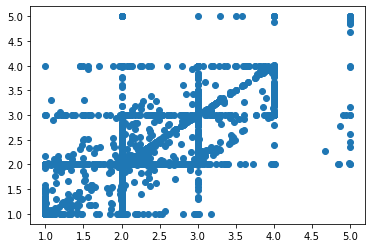

In [1406]:
df_plot[df_plot['admin_name'] == 'adan yabaal'].sort_values('date')

,area_phase,admin_name,pop,date
116005,4.000000,adan yabaal,74766.00,2009-10-01
116008,4.000000,adan yabaal,76547.00,2010-01-01
116011,4.000000,adan yabaal,76547.00,2010-04-01
116014,3.000000,adan yabaal,76547.00,2010-07-01
116017,3.999140,adan yabaal,76547.00,2010-10-01
116020,3.999140,adan yabaal,78473.00,2011-01-01
116023,3.999140,adan yabaal,78473.00,2011-04-01
116026,4.000000,adan yabaal,78473.00,2011-07-01
116029,4.000019,adan yabaal,78473.00,2011-10-01
116032,3.930489,adan yabaal,80399.00,2012-01-01
